In [1]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
# creating a DataFrame of given iris Dataset
import pandas as pd
data = pd.DataFrame({"sepal length":iris.data[:,0],
                     "sepal width":iris.data[:,1],
                     "petal length":iris.data[:,2],
                     "petal width":iris.data[:,3],
                     "species":iris.target})

In [5]:
data.tail()

,sepal length,sepal width,petal length,petal width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [6]:
names_col = ["sepal length", "sepal width", "petal length", "petal width"]
target = ["species"]
X = data[names_col]
y = data[target]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

<ipython-input-8-95668696ee36>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.9333333333333333


In [9]:
# sekarang bisa untuk prediksi jenis bunganya
model.predict([[3,5,4,2]]) #outputnya species 2, menunjukan bunga virginica

array([1])

Finding important features in Scikit-learn

Kita dapat menemukan fitur penting atau memilih fitur dalam dataset Iris. Dalam scikit-learn, kita dapat melakukan tugas ini dalam langkah-langkah berikut:
1. Create a random forest model
2. use the feature importance variable to see feature importance score
3. Visualize these scores using the seaborn library

In [10]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = model.predict(X_test)

<ipython-input-10-31b6c8c5b918>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


In [11]:
import pandas as pd

feature_imp = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp # output dari feature yang kurang penting adalah sepal width

petal length (cm)    0.510399
petal width (cm)     0.339805
sepal length (cm)    0.123840
sepal width (cm)     0.025957
dtype: float64

Setelah itu, kita dapat memvisualisasikan feature importances. visualisasi mudah dipahami dan interpretasikan

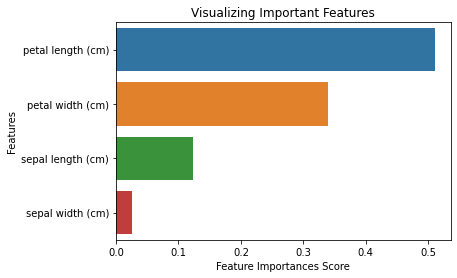

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel("Feature Importances Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

Generating the Model on Selected Features

Disini, kita dapat menghapus fitur "sepal width" karena tingkat kepentingannya sangat rendah, dan memilih 3 fitur lainnya

In [13]:
from sklearn.model_selection import train_test_split

# split dataset, feature and labels
X = data[["petal width", "petal length", "sepal length"]]
y = data["species"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, predicted))

Accuracy: 0.9555555555555556
